In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from itertools import count
import seaborn as sns

%matplotlib inline

In [62]:
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

In [63]:
lbl_to_plot = ['IS-Accuracy', 'OOS-Accuracy',
               'IS-MCC', 'OOS-MCC',
               'IS-EV', 'OOS-EV',]

In [64]:
def h_plot(data, lbls):
    index = 0
    while index < len(lbls):
        plt.hist(data[lbls[index]], bins=20, alpha=0.5, label=str(lbls[index]))
        plt.hist(data[lbls[index+1]], bins=20, alpha=0.5, label=str(lbls[index+1]))
        plt.legend(loc='upper right')
        plt.figsize=(7,6)
        plt.show()
        index += 2

In [65]:
def bx_plot(data, lbls):
    index = 0
    pos = 0
    f, axes = plt.subplots(3, 2, figsize=(13, 10), sharex=False)
    sns.set(style="whitegrid")
    while index < len(lbls):
        sns.boxplot(x="Model", y=lbls[index], data = data, ax=axes[pos, 0],hue="FeatureCount")
        sns.boxplot(x="Model", y=lbls[index+1], data = data, ax=axes[pos, 1],hue="FeatureCount")
        pos += 1
        index += 2


In [66]:
def v_plot(data, lbls):
    index = 0
    pos = 0
    f, axes = plt.subplots(3, 2, figsize=(11, 8), sharex=False)
    while index < len(lbls):
        sns.violinplot(x="Model", y=lbls[index], data = data, ax=axes[pos, 0])
        sns.violinplot(x="Model", y=lbls[index+1], data = data, ax=axes[pos, 1])
        pos += 1
        index += 2

In [23]:
# index = 0
# while index < len(lbl_to_plot):
#     sns.distplot(all_data[lbl_to_plot[index]], bins=10, color="skyblue", label=str(lbl_to_plot[index]))
#     sns.distplot(all_data[lbl_to_plot[index+1]], bins=10, color="red", label=str(lbl_to_plot[index+1]))
#     index += 2
#     plt.show()



In [5]:
# get list of sheets in each system dir
sheets = glob.glob("TLT-Long-System-*/*.csv")

In [6]:
len(sheets)

676

In [132]:
all_data = pd.DataFrame()
sheet_list = []
for i in sheets:
    #print(i)
    df = pd.read_csv(i)
    #print(len(df))
    j = 0
    while j< len(df):
        sheet_list.append(i)
        j += 1
    
    all_data = all_data.append(df,ignore_index=True)

In [133]:
len(sheet_list)

8112

In [108]:
all_data["sheet_name"] = sheet_list

In [103]:
len(all_data)

8112

In [109]:
all_data = all_data.drop(['beLongCount','Rows'],axis=1)

In [110]:
all_data.describe()

,FeatureCount,IS-Accuracy,IS-Precision,IS-RMC,IS-RF,IS-NPV,IS-MCC,IS-EV,OOS-Accuracy,OOS-Precision,OOS-RMC,OOS-RF,OOS-NPV,OOS-MCC,OOS-EV
count,8112.000,8112.000,8112.000,8112.000,8112.000,8112.000,8112.000,8112.000,8112.000,8112.000,8112.000,8112.000,8112.000,8112.000,8112.000
mean,7.453,0.719,0.698,0.177,0.279,0.720,0.430,0.106,0.540,0.554,0.340,0.432,0.494,0.060,0.021
std,1.248,0.103,0.149,0.042,0.107,0.101,0.214,0.053,0.055,0.091,0.108,0.057,0.070,0.112,0.036
min,5.000,0.551,0.444,0.035,0.010,0.537,0.074,0.012,0.400,0.337,0.084,0.169,0.351,-0.198,-0.057
25%,7.000,0.640,0.622,0.158,0.192,0.649,0.273,0.066,0.510,0.461,0.220,0.402,0.447,-0.005,-0.014
50%,7.000,0.733,0.742,0.167,0.263,0.729,0.463,0.116,0.533,0.562,0.349,0.435,0.476,0.020,0.024
75%,8.000,0.806,0.813,0.204,0.364,0.804,0.608,0.150,0.562,0.622,0.420,0.482,0.517,0.108,0.042
max,11.000,0.967,0.990,0.319,0.444,0.959,0.933,0.229,0.805,0.832,0.697,0.588,0.829,0.603,0.169


#### Summary for 676 feature sets
Feature range is 5 to 11
Mean OOS-Accuracy is 54%; std dev of 5.5%
Mean OOS-EV is 2.1%
Mean OOS-MCC is 0.06
Overall pretty close to flipping a coin 

In [9]:
all_data = all_data.dropna(axis = 0, how ='any')

In [10]:
all_data.shape[0]

8112

In [111]:
all_data.to_excel("IS_all_data_04072019_v2.xlsx") 

#### Model summary over all runs

In [112]:
g = {'IS-Accuracy':['mean','std'],'OOS-Accuracy':['mean','std']}
all_data.groupby(["Model"]).agg(g).reset_index()

Model IS-Accuracy        OOS-Accuracy       
                 mean    std         mean    std
0     GTB       0.565  0.002        0.524  0.014
1     KNN       0.759  0.029        0.546  0.055
2  LogReg       0.689  0.035        0.566  0.065
3     QDA       0.842  0.047        0.537  0.053
4      RF       0.816  0.023        0.532  0.058
5     SVM       0.646  0.054        0.538  0.056

### Trim result set to eliminate underperforming models
Starting conservatively, trim data set to accuracy greater than 50% and MCC > 0 and EV > 0.05

In [113]:
better_data = all_data[(all_data["OOS-Accuracy"] > 0.5) & (all_data["OOS-MCC"] > 0.0)& (all_data["OOS-EV"] > 0.05)]

In [114]:
better_data.shape[0]

1538

In [115]:
e = {'IS-EV':['mean','std'],'OOS-EV':['mean','std']}
eg = {'OOS-Accuracy':['mean','std'],'OOS-EV':['mean','std']}

In [116]:
better_data.groupby(["Model"]).agg(eg).reset_index()

Model OOS-Accuracy        OOS-EV       
                  mean    std   mean    std
0     KNN        0.617  0.050  0.073  0.022
1  LogReg        0.633  0.060  0.080  0.026
2     QDA        0.609  0.044  0.071  0.021
3      RF        0.613  0.056  0.072  0.025
4     SVM        0.645  0.061  0.082  0.028

In [117]:
better_data.groupby(["Model"]).agg(e).reset_index()

Model  IS-EV        OOS-EV       
            mean    std   mean    std
0     KNN  0.135  0.016  0.073  0.022
1  LogReg  0.110  0.016  0.080  0.026
2     QDA  0.180  0.021  0.071  0.021
3      RF  0.163  0.008  0.072  0.025
4     SVM  0.113  0.017  0.082  0.028

In [118]:
better_data.groupby(["FeatureCount"]).agg(eg).reset_index()

FeatureCount OOS-Accuracy        OOS-EV       
                       mean    std   mean    std
0            5        0.660  0.074  0.090  0.033
1            6        0.618  0.051  0.073  0.023
2            7        0.634  0.061  0.080  0.027
3            8        0.621  0.058  0.075  0.025
4            9        0.614  0.045  0.073  0.020
5           10        0.597  0.033  0.066  0.015
6           11        0.594  0.035  0.065  0.015

Clearly the feature counts of 10, 11 are underperforming the other feature counts. Before these are dropped, what is the ditribution of models by feature count.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


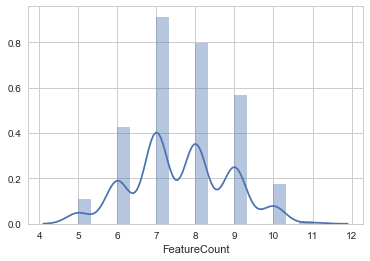

In [119]:
sns.distplot(better_data.FeatureCount)

Dropping FeatureCount = 10, 11

In [120]:
better_data2 = better_data[(better_data["FeatureCount"] != 10) & (better_data["FeatureCount"] != 11)]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


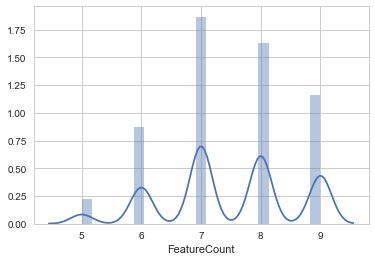

In [121]:
sns.distplot(better_data2.FeatureCount)

#### Look at results across all data

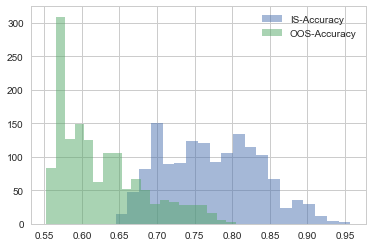

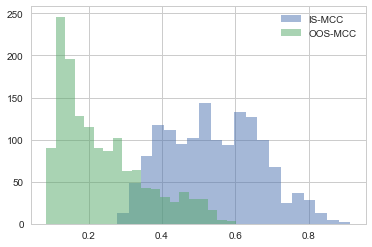

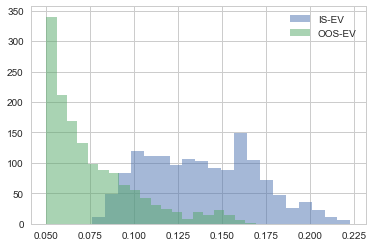

In [122]:
h_plot(better_data2, lbl_to_plot)

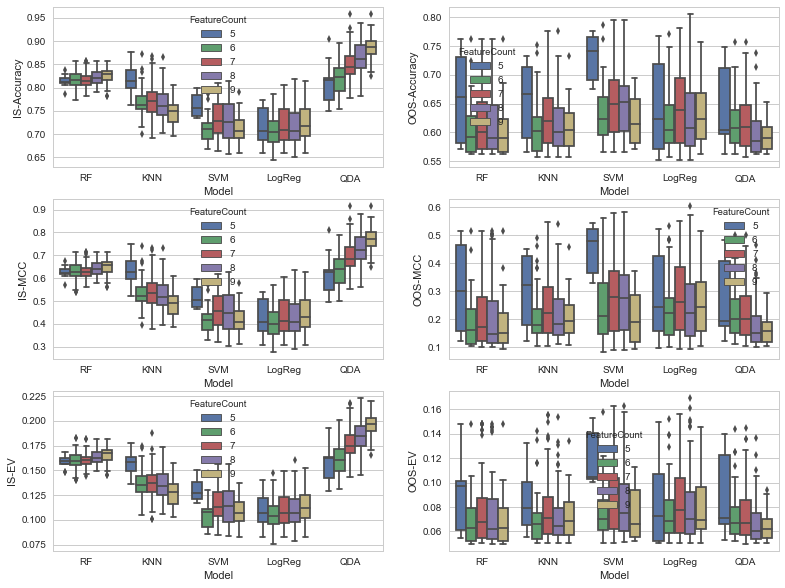

In [123]:
bx_plot(better_data2, lbl_to_plot)

Too many model data to distinguish results. Filtering results again for better performance to see if model or feature counts show weakness or strength.

In [124]:
better_data3 = better_data2[(better_data2["OOS-Accuracy"] > 0.6) & (better_data2["OOS-MCC"] > 0.1)& (better_data2["OOS-EV"] > 0.1)]

In [125]:
better_data3.groupby(["Model"]).agg(eg).reset_index()

Model OOS-Accuracy        OOS-EV       
                  mean    std   mean    std
0     KNN        0.711  0.034  0.121  0.017
1  LogReg        0.722  0.033  0.123  0.017
2     QDA        0.707  0.029  0.120  0.014
3      RF        0.731  0.036  0.130  0.020
4     SVM        0.727  0.041  0.121  0.022

In [126]:
better_data3.groupby(["FeatureCount"]).agg(eg).reset_index()

FeatureCount OOS-Accuracy        OOS-EV       
                       mean    std   mean    std
0            5        0.731  0.034  0.124  0.020
1            6        0.720  0.034  0.123  0.017
2            7        0.724  0.036  0.124  0.018
3            8        0.721  0.039  0.123  0.020
4            9        0.704  0.026  0.117  0.012

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


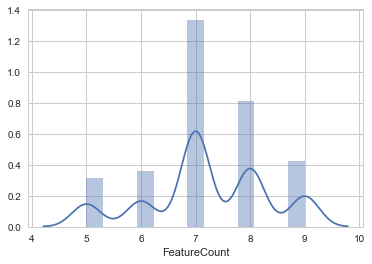

In [127]:
sns.distplot(better_data3.FeatureCount)

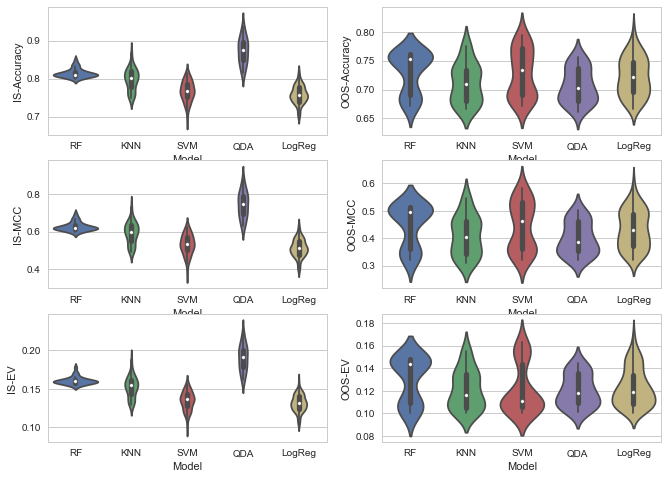

In [128]:
v_plot(better_data3, lbl_to_plot)

In [129]:
better_data3.to_excel("IS_better_data3_04072019_v2.xlsx") 

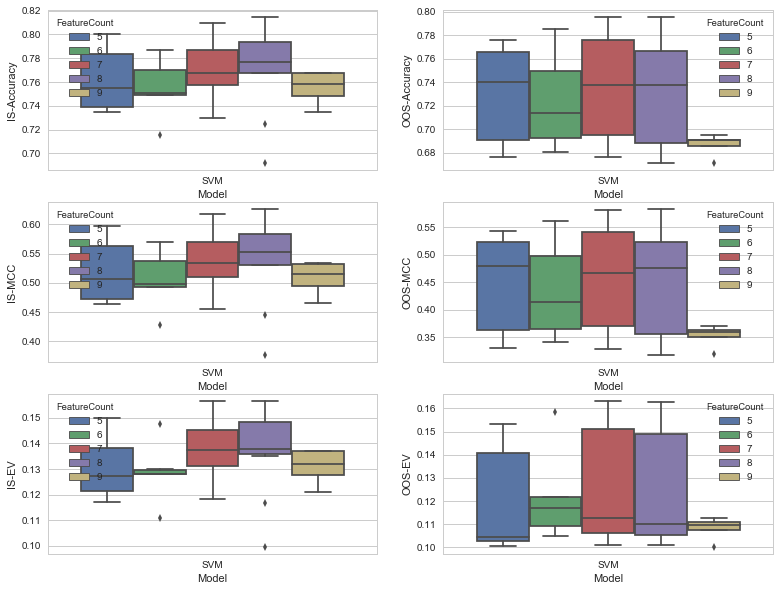

In [131]:
bx_plot(better_data3[better_data3["Model"]=='SVM'], lbl_to_plot)

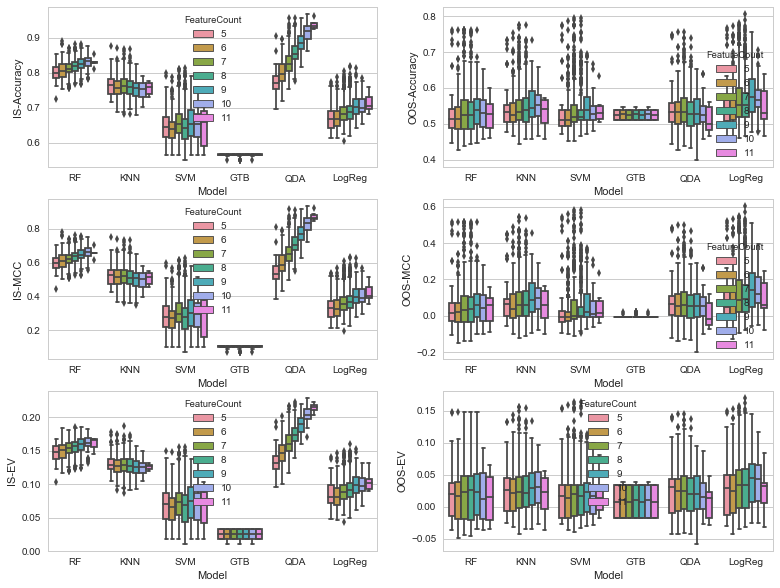

In [28]:
bx_plot(all_data, lbl_to_plot)

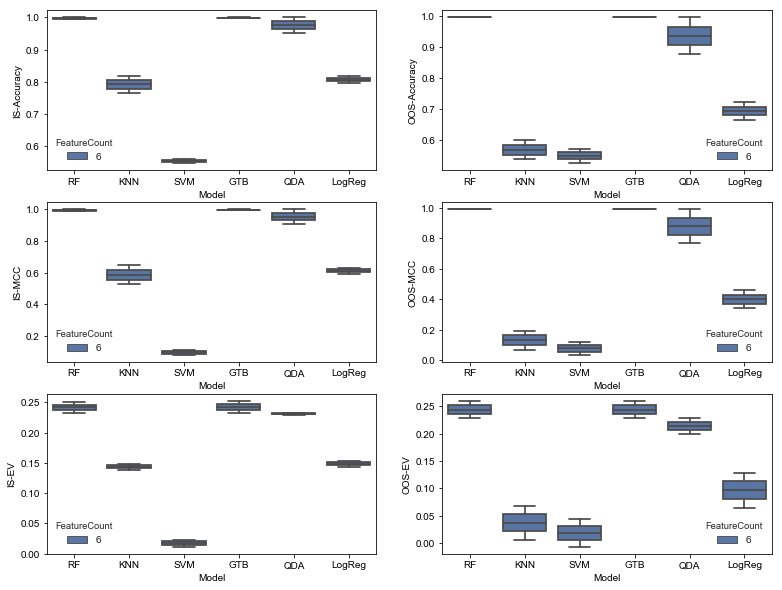

In [14]:
bx_plot(all_data[all_data["FeatureCount"]==6], lbl_to_plot)

In [ ]:
bx_plot(all_data[all_data["FeatureCount"]==7], lbl_to_plot)


In [ ]:
bx_plot(all_data[all_data["FeatureCount"]==8], lbl_to_plot)

In [ ]:
bx_plot(all_data[all_data["FeatureCount"]==9], lbl_to_plot)

### Slice data to use various sets of features (6, 7, 8) and exclude KNN, SVM model results

In [ ]:
slim_data = all_data[(all_data.Model != "KNN") & (all_data.Model != "SVM")]

In [ ]:
h_plot(slim_data[slim_data["FeatureCount"]==6], lbl_to_plot)

#### 6 features

In [ ]:
bx_plot(slim_data[slim_data["FeatureCount"]==6], lbl_to_plot)

In [ ]:
bx_plot(slim_data[slim_data["FeatureCount"]==7], lbl_to_plot)

In [ ]:
bx_plot(slim_data[slim_data["FeatureCount"]==8], lbl_to_plot)

#### Reduce results with poor results removed

In [30]:
best_data = all_data[(all_data["OOS-Accuracy"] > 0.5) & (all_data["OOS-MCC"] > 0.0)& (all_data["OOS-EV"] > 0.05)]

In [33]:
best_data.groupby(["Model"])["IS-Accuracy","OOS-Accuracy"].agg([np.mean, np.std])

IS-Accuracy           OOS-Accuracy          
              mean       std         mean       std
Model                                              
KNN       0.763355  0.034881     0.616547  0.049996
LogReg    0.716968  0.035947     0.633365  0.060464
QDA       0.854915  0.043187     0.609254  0.043985
RF        0.820786  0.017515     0.612827  0.056186
SVM       0.723855  0.037906     0.645457  0.060964

In [34]:
best_data.shape[0]

1538

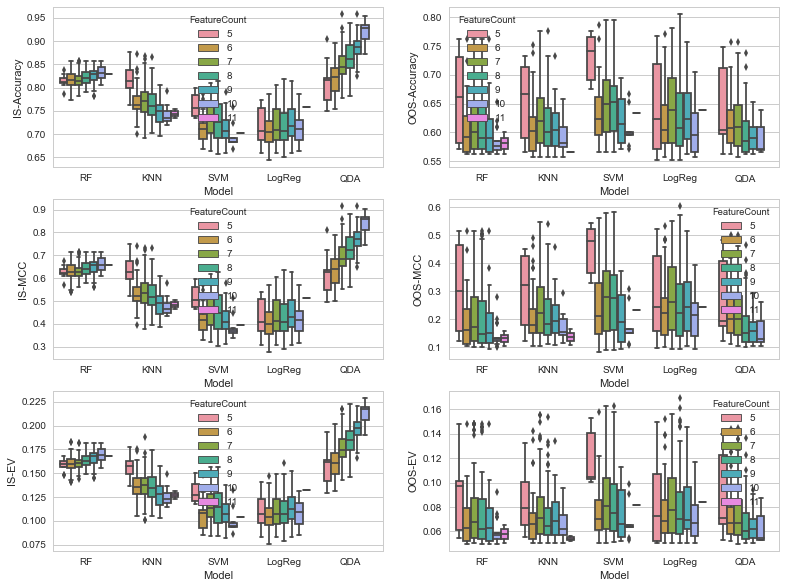

In [31]:
bx_plot(best_data, lbl_to_plot)

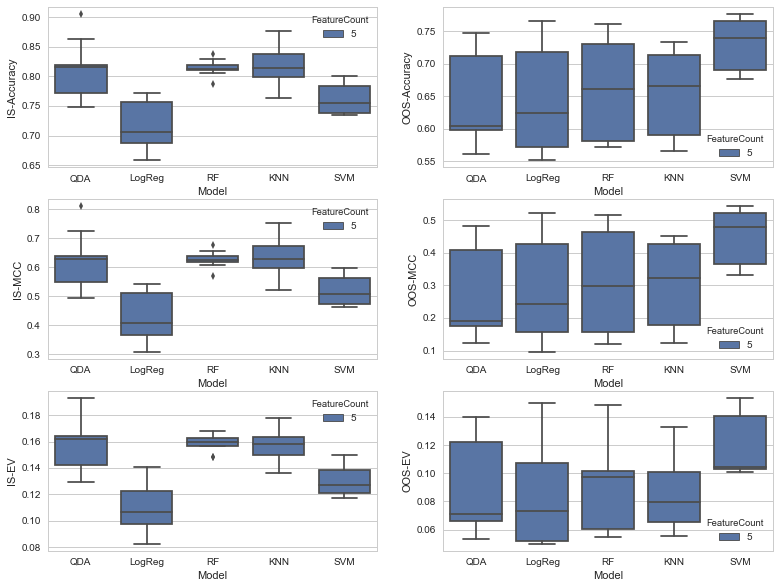

In [32]:
bx_plot(best_data[best_data["FeatureCount"]==5], lbl_to_plot)

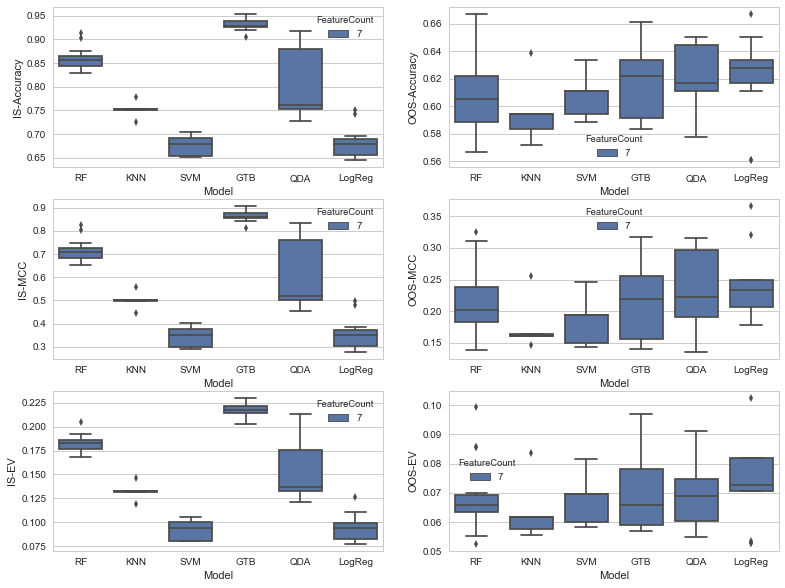

In [20]:
bx_plot(best_data[best_data["FeatureCount"]==7], lbl_to_plot)

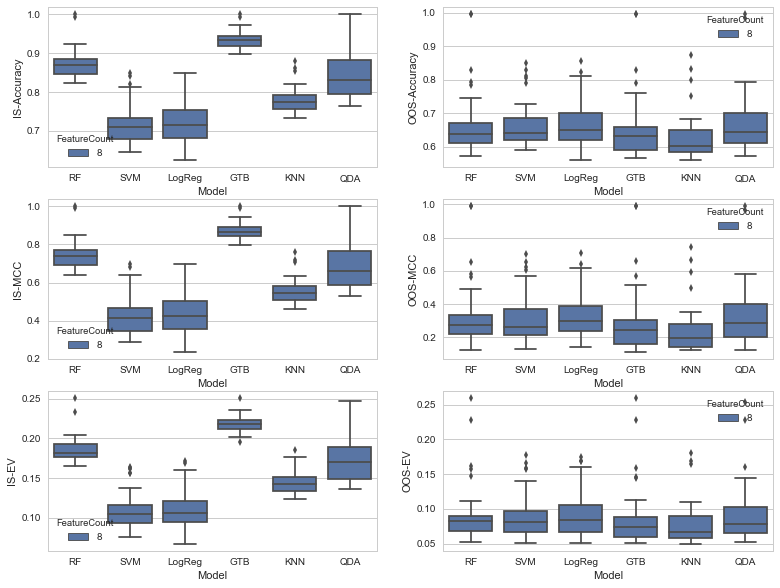

In [21]:
bx_plot(best_data[best_data["FeatureCount"]==8], lbl_to_plot)

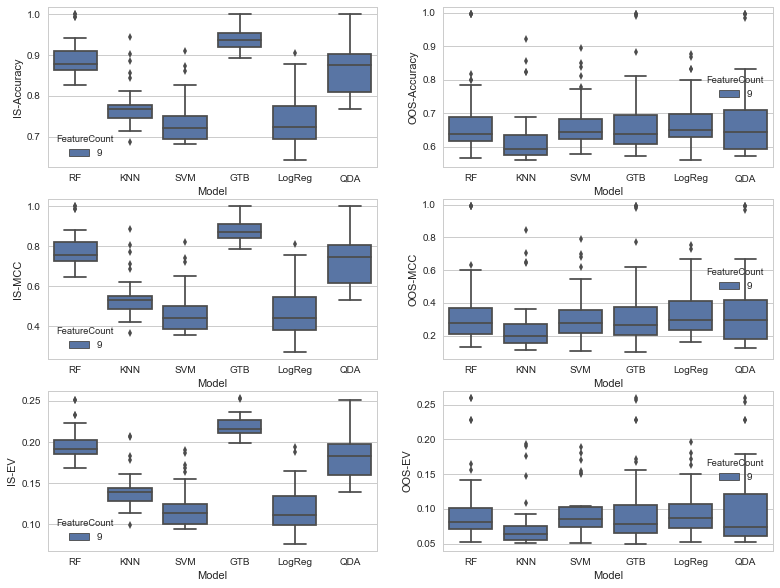

In [22]:
bx_plot(best_data[best_data["FeatureCount"]==9], lbl_to_plot)